In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels .graphics.tsaplots import plot_acf
from statsmodels .graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [6]:
df = pd.read_csv('candy_production.csv')

In [7]:
df['observation_date'] = pd.to_datetime(df['observation_date'], infer_datetime_format=True)
df = df.set_index(['observation_date'])
df.head()


/var/folders/7s/8gykf97x5cn2tcc2nnlh93t40000gn/T/ipykernel_70816/4124838895.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['observation_date'] = pd.to_datetime(df['observation_date'], infer_datetime_format=True)


,IPG3113N
observation_date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


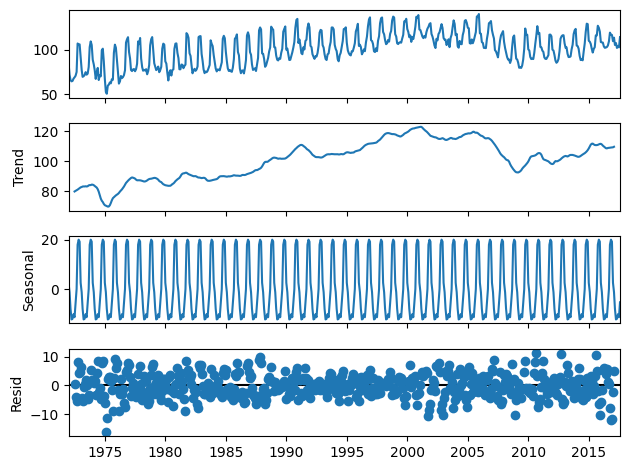

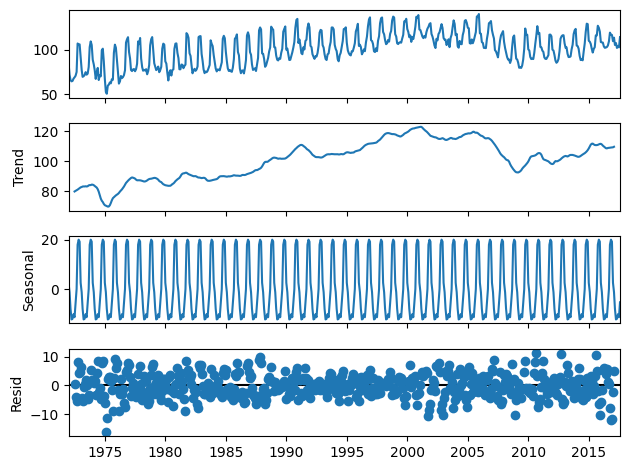

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df, model= 'additive')
decompose_data.plot()

# Stationary test

In [15]:
def test_stationarity(timeseries):
    # Drop NaN values
    timeseries.dropna(inplace=True)
    
    # Calculate rolling mean and standard deviation
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()  # Corrected this line

    # Plot original timeseries, rolling mean and standard deviation
    plt.plot(timeseries, label='Original')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std Dev')
    plt.legend(loc='best')
    plt.title('Timeseries data with rolling mean and std. dev.')
    plt.show()

    # Perform Dickey-Fuller test:
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    print(dfoutput)

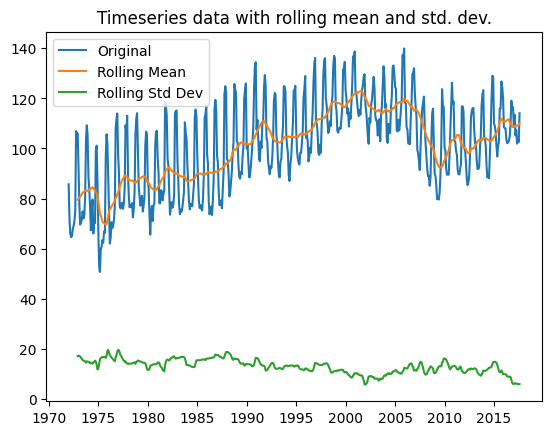

Test Statistic                  -1.887050
p-value                          0.338178
#Lags Used                      14.000000
Number of Observations Used    533.000000
dtype: float64


In [16]:
test_stationarity(df)

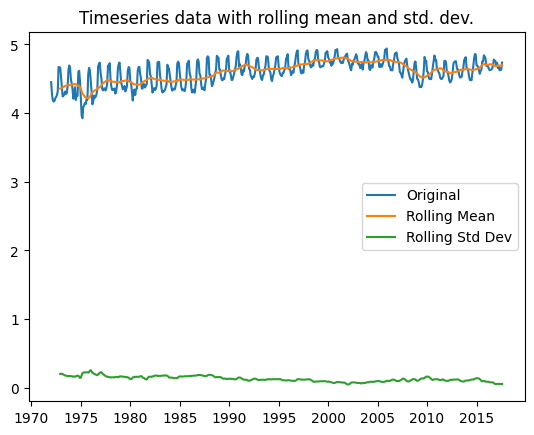

Test Statistic                  -1.841721
p-value                          0.359954
#Lags Used                      15.000000
Number of Observations Used    532.000000
dtype: float64


In [18]:
df_log = np.log(df)
test_stationarity(df_log)

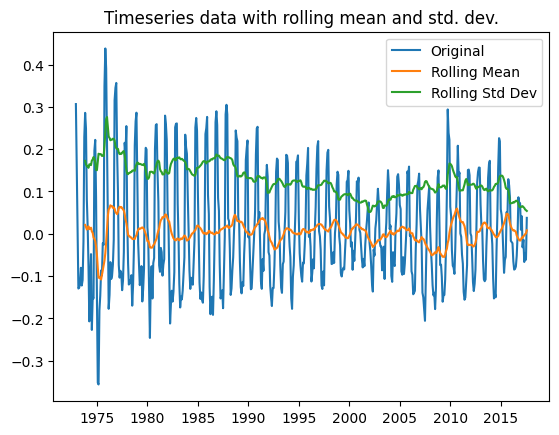

Test Statistic                -7.573451e+00
p-value                        2.801611e-11
#Lags Used                     1.400000e+01
Number of Observations Used    5.220000e+02
dtype: float64


In [19]:
ma = df_log.rolling(window=12).mean()
df_log_minus_ma = df_log - ma
test_stationarity(df_log_minus_ma)

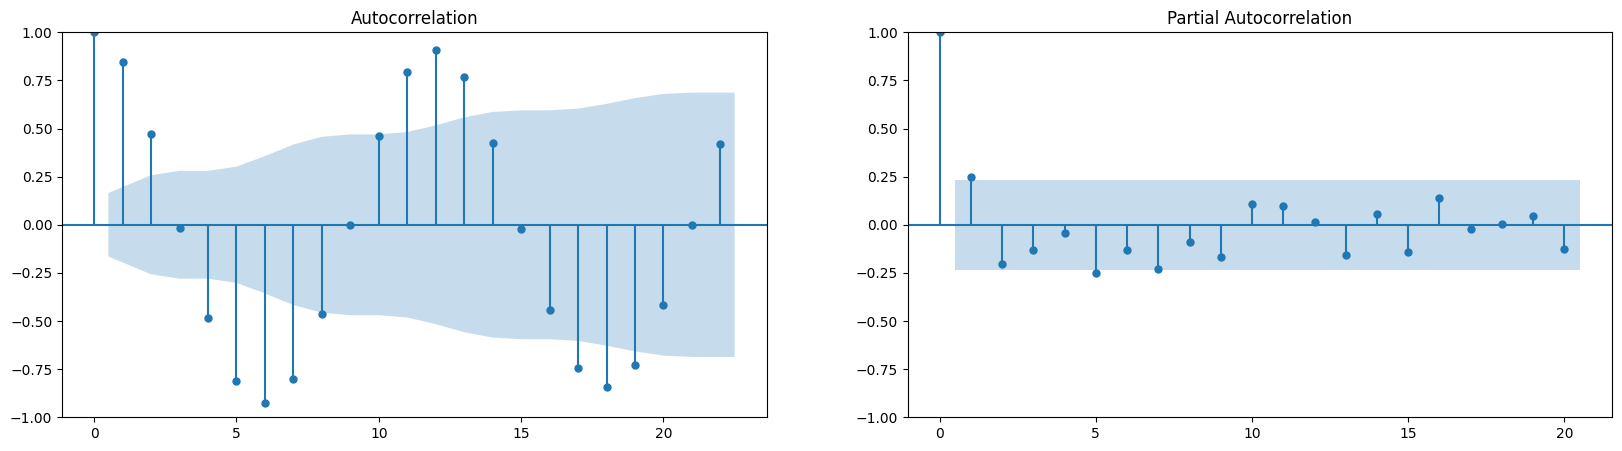

In [21]:
lag_acf = acf(df_log_minus_ma, nlags = 140)
lag_pacf = pacf(df_log_minus_ma, nlags = 70)
fig, ax = plt.subplots(1,2, figsize=(20,5))

plot_acf(lag_acf, ax=ax[0])
plot_pacf(lag_pacf, lags=20, ax=ax[1])
plt.show()

In [23]:

df_log_minus_ma.dropna(inplace=True)
train, test = train_test_split(df_log_minus_ma, test_size = 0.10, shuffle=False)
#ARIMA model model
model_arima = ARIMA(train, order=(2, 1,2))
model_arima_fit = model_arima.fit ()
predictions = model_arima_fit.predict(start='2013-03-01', end='2017-08-01')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
error = mean_squared_error(test, predictions)
print('Test MSE %.5F' % error)

Test MSE 0.00928


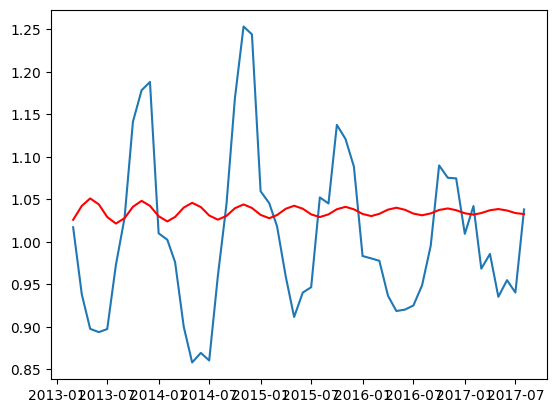

In [26]:
predict = np.exp(predictions)
test_set = np.exp(test)

plt.plot(test_set)
plt.plot(predict, color='red')
plt.show()

# SARIMAX

In [30]:
model_sarimax = sm.tsa.statespace.SARIMAX(train, order=(2,1,2), seasonal_order =(2,1,2,12))
model_sarimax_fit = model_sarimax.fit()

predictions_sarimax = model_sarimax_fit.predict(start='2013-03-01', end='2017-08-01')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.72370D+00    |proj g|=  5.31589D+00

At iterate    5    f= -1.74342D+00    |proj g|=  7.63213D-01

At iterate   10    f= -1.75080D+00    |proj g|=  7.06169D-02

At iterate   15    f= -1.75094D+00    |proj g|=  3.49113D-01

At iterate   20    f= -1.75163D+00    |proj g|=  4.04292D-02

At iterate   25    f= -1.75243D+00    |proj g|=  5.80546D-01

At iterate   30    f= -1.75269D+00    |proj g|=  2.65154D-02

At iterate   35    f= -1.75297D+00    |proj g|=  2.15874D-02

At iterate   40    f= -1.75313D+00    |proj g|=  1.60356D-01

At iterate   45    f= -1.75555D+00    |proj g|=  7.81433D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.76219D+00    |proj g|=  3.32740D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     61      1     0     0   3.327D-01  -1.762D+00
  F =  -1.7621887810921921     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


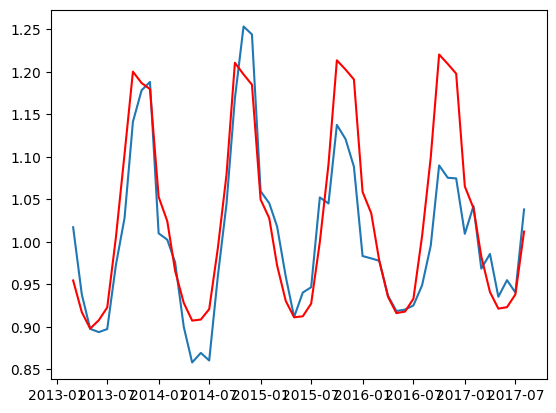

In [31]:
predict_sarimax = np.exp(predictions_sarimax)
test_set = np.exp(test)

plt.plot(test_set)
plt.plot(predict_sarimax, color='red')
plt.show()